 # Домашнее задание
 ### Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [15]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats as st # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

import seaborn as sns # Более продвинутая библиотека для визуализации

Используем следующую формулу:

$$ \Delta = \frac{\sigma}{\sqrt{n}}Z $$

- $\Delta$ - допустимая ошибка/погрешность, 

- n - размер выборки

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [8]:
### Вначале инициализируем исходные данные и вычисляем Z для заданного по условию задачи доверительного интервала 98%
P = 0.98
n = 25
Sigma = 15
data_mean = 130
Z = st.norm.ppf(P)
# Далее считаем допустимую погрешность по выше приведенной формуле
Delta = Sigma*Z/n**.5

# Фактически по условию задачи требуется в ответе указать удвоенное значение Delta, т.е. разницу (с округлением до целого)
# (data_mean + Delta) - (data_mean + Delta) = 2*Delta

#Запишите в эту переменную ваш высчитанный ответ!
L = round(Delta * 2)
L


12

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьюдента, что различия между выборками незначительны, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [20]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

men  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
women = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируются две выбороки, где loc это среднее значение, а scale это дисперсия

### Ваш код...

t, p_value = stats.ttest_ind(men, women) #Критерий Стьюдента (t-test)
t, p_value
# По условию задачи требуется доказать, что различие между выборками незначительно, если уровень значимости равен 0.001.
# Мы можем прийти к этому выводу, если p_value окажется меньше этой величины, т.е. в этом случае мы должны отвергнуть гипотезу 
# о незначительности различий. Именно этот результат мы и получили - p_value почти в пять раз меньше заданного уровня значимости.
# Или я не понял задачу и решил ее неверно, либо есть какие-то ошибки в формулировке задания.

(3.6635841716708892, 0.00024875321033580573)

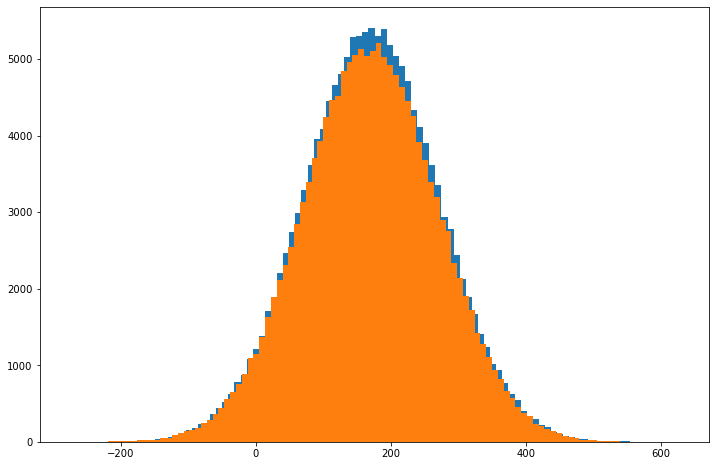

In [21]:
# При этом на графиках никаких особых отличий между распределенями я не вижу, т.е. при текущих условиях, 
# наложенных на формирование данных, выборки выглядят малоотличимыми, т.е. различия незначительны.
plt.hist(men, bins=100); #Мужчины
plt.hist(women, bins=100);  #Женщины

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [26]:
### Тут вычисления, обратные вычислению из первой задачи
P = 0.95
Sigma = 150
Delta = 50
# Вначале вычисляем квантиль для 95 процентов
Z = st.norm.ppf(P)
# Далее считаем искомую величину и увеличиваем до ближайшего целого
n = round((Sigma*Z/Delta)**2) + 1
n

25

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [27]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [28]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутствие эффекта

### Ваш код...

oddsratio, pvalue = st.fisher_exact(observations)
oddsratio, pvalue


(0.5811965811965812, 0.35417955365927367)

In [ ]:
# Фактически мы получили чудовищно большое значение p_value (0.35), которое не дает нам никаких оснований для отвержения 
# нулевой гипотезы о том, что предсказатель - сказочник с хорошо подвешенным языком :) 

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [29]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

# Копия кода функции из учебного ноутбука
def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

### Ваш код...
print(mean_confidence_interval(data, 0.9))
# Первая и третья цифры показывают начало и конец диапазона значений доверительного интервала, а вторая цифра - среднее

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [30]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

#Ваш код:
# Вначале "в лоб" используем критерий Стьюдента (t-test)
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

(11.865233896372924, 4.623319592204015e-25)

In [37]:
# Результаты этой проверки показывают, что выборки с большой вероятностью очень сильно отличаются.
# p-value фактически стремится к нулю, также высоко и значение t.
# Проверим это, вычислив средние по выборкам
print(sum(A)/len(A))
print(sum(B)/len(B))

6.446428571428571
4.147368421052631


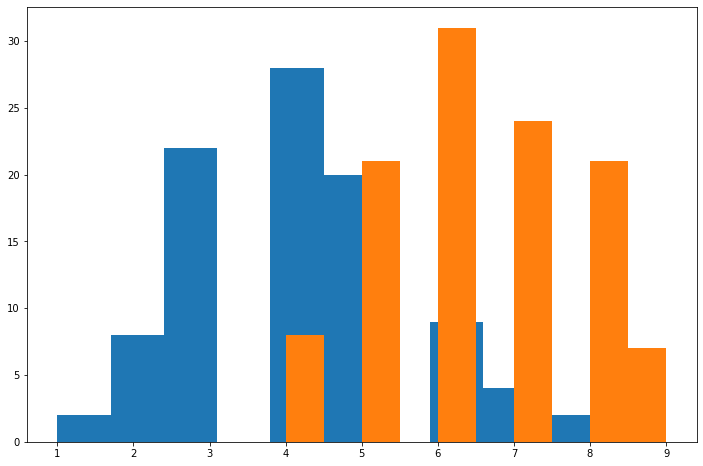

In [42]:
plt.hist(B, bins=10); #Выборка A
plt.hist(A, bins=10);  #Выборка B
# Хорошо видно, что выборки по набору данных похожи на выборки с нормальным распределением, а их средние сдвинуты

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
### Ваши выводы:
# Поскольку значение p-value в нашем случае равно 0.03 и оно меньше 0.05, мы имеем право отвергнуть нулевую гипотезу.
# Поскольку нулевая гипотеза утверждает, что распределение - нормальное, 
# мы считаем, что альтернативная гипотеза о ненормальном распределении заслуживает внимания в бОльшей степени.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [51]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

(-1.95300880485141, 0.051284593140469285)

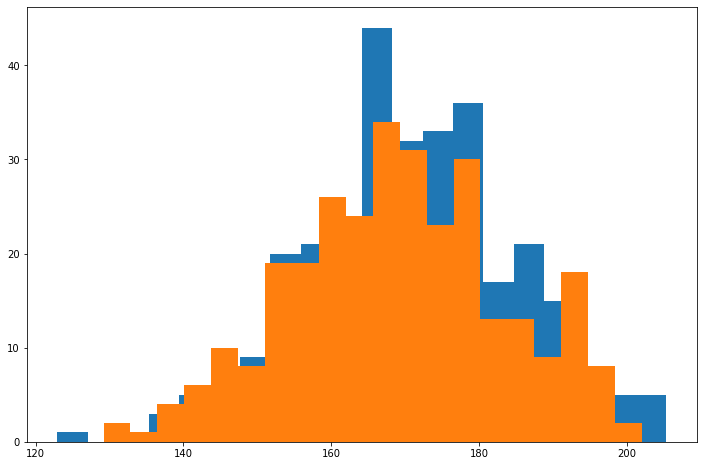

In [53]:
# При выбранном уровне значимости в 0.05 вычисленное значение p-value совсем незначительно, но превышает 0.05.
# В этой связи нельзя отвергнуть нулевую гипотезу о том, что препараты A и B не отличаются по своей эффективности.
# Формально при любом p, которое было бы меньше 0.05, можно было бы говорить о том, что различия становятся значимыми.
# В условиях задачи рекомендовано продемонстрировать различия выборок визуально, если они отличаются, но они не отличаются :)
# Тем не менее посмотрим, как это выглядит:
plt.hist(B, bins=20); #Выборка A
plt.hist(A, bins=20);  #Выборка B
# Действительно, явных различий в распределении данных не заметно.